## Init

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [49]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


### Objective function

In [50]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [51]:
def sga(crossover_f, mutation_f):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 250

    time0 = time.time()
    
    costs = np.zeros(number_of_iterations)
    
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
        best_chromosome = current_population[0, :]
        
        costs[t] = objective_values[0]
        #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
        
    return costs

## Crossover functions

In [52]:
def PMX(ind1, ind2):
    a = np.random.choice(len(ind1)-2, 2, False)
    i, j = a.min(), a.max()
    np.vstack((ind1[i:j],ind2[i:j])).T
    match = np.zeros(len(ind1)).astype(int)
    for p in np.vstack((ind1[i:j],ind2[i:j])).T:
        match[p[0]] = p[1]    
        match[p[1]] = p[0]
    
    child1 = np.concatenate((ind1[:i], ind2[i:j], ind1[j:]))
    child2 = np.concatenate((ind2[:i], ind1[i:j], ind2[j:]))

    for k in np.delete(np.arange(len(ind1)), np.arange(i,j)):
        while child1[k] in ind2[i:j]:
            index = np.where(ind2[i:j] == child1[k])[0][0]
            child1[k] = ind1[i:j][index]
        while child2[k] in ind1[i:j]:
            index = np.where(ind1[i:j] == child2[k])[0][0]
            child2[k] = ind2[i:j][index]
    return child1, child2

In [53]:
def CX(ind1, ind2):
    idx = 0
    tmp = ind2[0]
    
    child1 = ind1.copy()
    child2 = ind2.copy()
    
    while tmp != ind1[0]:
        tmp = ind2[idx]
        idx = np.where(ind1 == tmp)[0][0]
        child1[idx] = ind2[idx]
        child2[idx] = ind1[idx]
        
    child1[0] = ind2[0]
    child2[0] = ind1[0]
    
    return child1, child2
        

In [54]:
def OX(ind1, ind2):
    a = np.random.choice(len(ind1), 2, False)
    i, j = a.min(), a.max()
    child1 = ind1.copy()
    child2 = ind2.copy()
    
    it = j
    it2 = j
    while it != i:
        while ind2[it2] in ind1[i:j]:
            it2 = (it2+1) % len(ind1)
        it2 = (it2+1) % len(ind1)
        child1[it] = ind2[it2]
        it = (it+1) % len(ind1)
        
    it = j
    it2 = j
    while it != i:
        while ind1[it2] in ind2[i:j]:
            it2 = (it2+1) % len(ind1)
        it2 = (it2+1) % len(ind1)
        child2[it] = ind1[it2]
        it = (it+1) % len(ind1)

    return child1, child2   

In [77]:
def K_pointcrossover(ind1, ind2):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    child1 = ind1.copy()
    child2 = ind2.copy()
    
    child1[:i] = ind2[:i]
    child2[:i] = ind1[:i]
    child1[j:] = ind2[j:]
    child2[j:] = ind1[j:]
    
    return child1, child2

## Mutation functions

In [55]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [56]:
def random_swaps(p):
    q = p.copy()
    for i in range(p/10):
        a = np.random.choice(len(p), 2, False)
        i, j = a.min(), a.max()
        q[i], q[j] = q[j], q[i]
    return q

In [71]:
def random_rearrange(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = np.random.schuffle(q[i:j+1])
    return q

In [57]:
d = {}

In [58]:
d[('PMX','REV')] = sga(PMX, reverse_sequence_mutation)

In [59]:
d[('PMX','RS')] = sga(PMX, random_swaps)

In [74]:
d[('PMX','RR')] = sga(PMX, random_rearrange)

In [60]:
d[('CX','REV')] = sga(CX, reverse_sequence_mutation)

In [61]:
d[('CX','RS')] = sga(CX, random_swaps)

In [75]:
d[('CX','RR')] = sga(CX, random_rearrange)

In [62]:
d[('OX','REV')] = sga(OX, reverse_sequence_mutation)

In [63]:
d[('OX','RS')] = sga(OX, random_swaps)

In [76]:
d[('OX','RR')] = sga(OX, random_rearrange)

In [78]:
d[('KPX','REV')] = sga(K_pointcrossover, reverse_sequence_mutation)

In [79]:
d[('KPX','RS')] = sga(K_pointcrossover, random_swaps)

In [80]:
d[('KPX','RR')] = sga(K_pointcrossover, random_rearrange)

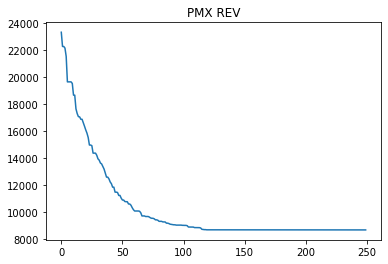

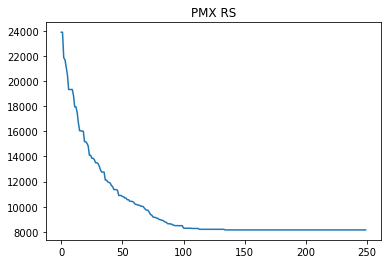

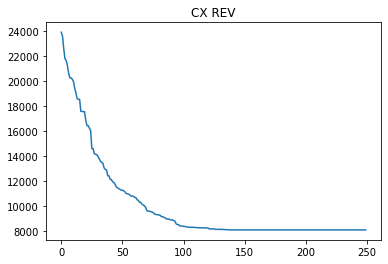

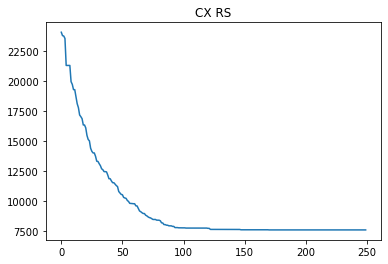

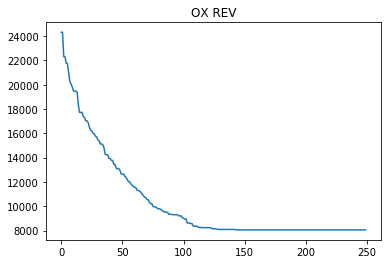

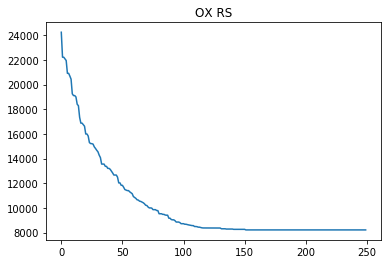

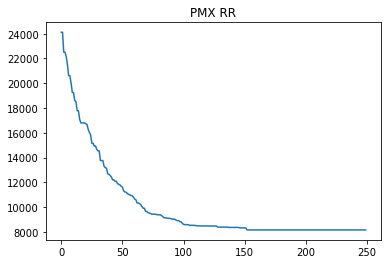

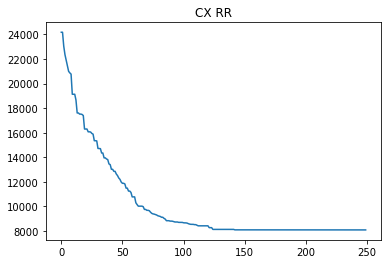

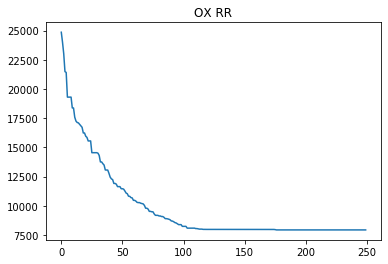

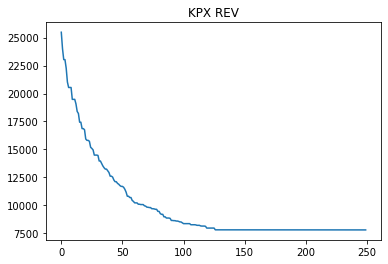

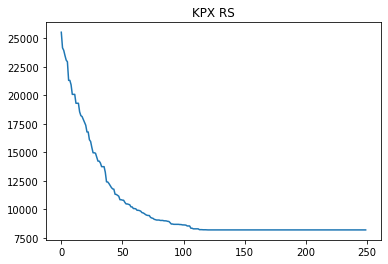

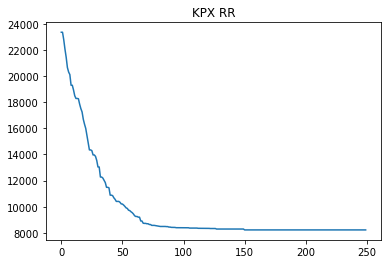

In [81]:
for (operator, mutation), data in d.items():
    plt.figure()
    plt.title(operator + ' ' + mutation)
    plt.plot(d[(operator, mutation)])
    plt.show()